In [587]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools
from scipy.spatial import distance
plt.style.use('fivethirtyeight') 

%matplotlib inline

In [588]:
data_set = np.loadtxt("krr-train.txt") 

In [589]:
x1_coordinate = data_set[:,0].reshape(-1,1);x1_coordinate = x1_coordinate*2
x2_coordinate = data_set[:,1].reshape(-1,1);x2_coordinate = x2_coordinate*2

In [590]:
#Manually set the line to separate dataset
def line(x):
    y = -1.0*x + 1.8
    return y
x_pts = np.linspace(-0.5,2.5,num=1000)

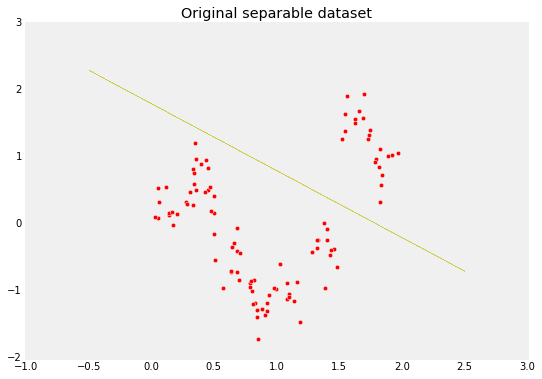

In [591]:
fig = plt.figure(1,figsize=(8, 6))
ax = fig.add_subplot(111)
plt.scatter(x1_coordinate,x2_coordinate,c='r' ) 
plt.scatter(x_pts,line(x_pts),linewidth=0.001,s=0.5,c='y')
plt.title('Original separable dataset')
ax.grid(False) 

In [601]:
#Manually create labels(-1,+1) for the dataset 
label=[]
for pair in zip(x1_coordinate,x2_coordinate): 
    if pair[1] < line(pair[0]):
        label.append(-1)
    else:
        label.append(1)

In [602]:
#Initialize parameter w and b 
w = np.array([0,0])
b = 0

In [603]:
#Algorithm of Perceptron: 'original form'
learn_rate = 0.01
for itr in range(1000):
    index = np.random.choice(100)
    x = np.array([x1_coordinate[index][0],x2_coordinate[index][0]])
    #print(np.inner(w,x)) 
    y = label[index]
    if y*(np.inner(w,x)+b) <= 0:
        w = w + learn_rate*y*x
        b = b + learn_rate*y

In [604]:
#Return the optimized parameter w
w

array([ 0.02775335,  0.02252677])

In [605]:
#Return the optimized parameter b 
b

-0.04

In [606]:
#label predict by trained Perceptron
new_label=[] 
for i in range(100):
    x_coordinate = [x1_coordinate[i][0],x2_coordinate[i][0]]
    new_label.append(np.sign(np.inner(w,x_coordinate)+b))

In [607]:
new_label == label

True

In [608]:
def superplane(x):
    y = (-w[0]/w[1])*x + (-b)/w[1]
    return y
x_pts = np.linspace(-0.5,2.5,num=10000)

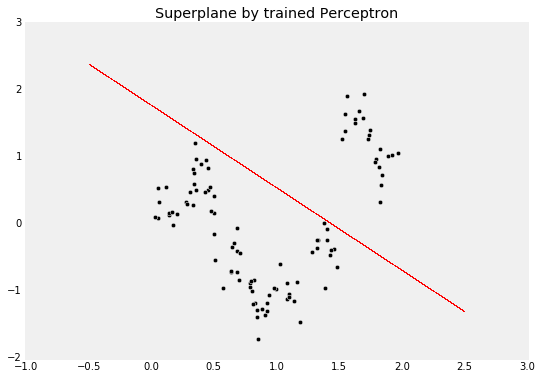

In [609]:
fig = plt.figure(1,figsize=(8, 6))
ax = fig.add_subplot(111) 
plt.scatter(x1_coordinate,x2_coordinate,c='black' ) 
plt.scatter(x_pts,superplane(x_pts),linewidth=0.001,s=1,c='r')
plt.title('Superplane by trained Perceptron')
ax.grid(False) 

### Perceptron Dual Form

In [775]:
X = np.hstack((x1_coordinate,x2_coordinate))

In [776]:
#Create Gram matrix
Gram = np.dot(X,X.T) 

In [777]:
#Initialize parameters
alpha = np.zeros(len(x1_coordinate))
b = 0 
learn_rate = 0.1 

In [778]:
for itr in range(1000):
    i = np.random.choice(100)
    
    if label[i]* (sum(alpha*label*Gram[i])+b) <= 0:
        alpha[i] += learn_rate
        b += learn_rate*label[i]

In [779]:
w=0
for i in range(100):
    w += alpha[i]*label[i]*X[i]

In [780]:
#Prediction by dual Perceptron
prediction=[]
for i in range(100):
    prediction.append(np.sign(np.inner(w,X[i])+b))
prediction == label

True

In [781]:
w

array([ 0.2801719 ,  0.14246565])

In [782]:
b

-0.5

In [783]:
def superplane(x):
    y = (-w[0]/w[1])*x + (-b)/w[1]
    return y
x_pts = np.linspace(-0.5,2.5,num=10000)

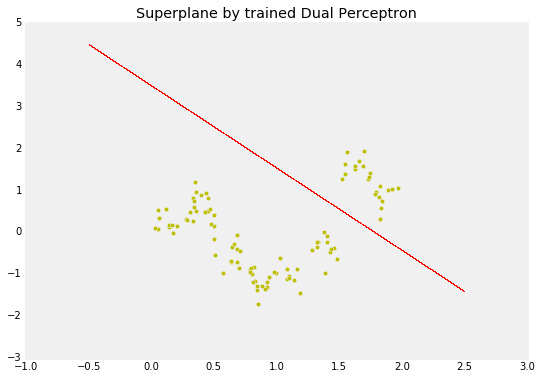

In [784]:
fig = plt.figure(1,figsize=(8, 6))
ax = fig.add_subplot(111)
plt.scatter(x1_coordinate,x2_coordinate,c='y' ) 
plt.scatter(x_pts,superplane(x_pts),linewidth=0.001,s=1,c='r')
plt.title('Superplane by trained Dual Perceptron')
ax.grid(False) 